## Markov Model of a Ball Game with Conditional Exit

In [2]:
import numpy as np
import pandas as pd

# ---------- CASE A ---------- #
# States: [T, S, B, J, R]
states_a = ['T', 'S', 'B', 'J', 'R']
P_a = np.zeros((5, 5))

# From T: 0.5 to S, 0.5 to J
P_a[0, 1] = 0.5  # T -> S
P_a[0, 3] = 0.5  # T -> J

# From S: 1/3 to T, 2/3 to J
P_a[1, 0] = 1/3  # S -> T
P_a[1, 3] = 2/3  # S -> J

# From B: 1 to S
P_a[2, 1] = 1.0  # B -> S

# From J: 2/3 to T, 1/3 to R
P_a[3, 0] = 2/3  # J -> T
P_a[3, 4] = 1/3  # J -> R

# From R: stays in R (absorbing)
P_a[4, 4] = 1.0  # R -> R

# Display Case A
df_a = pd.DataFrame(P_a, index=states_a, columns=states_a)
print("Transition Matrix - Case (a):\n")
print(df_a)


# ---------- CASE B ---------- #
# States: [T, S, B, J1, J2, R]
states_b = ['T', 'S', 'B', 'J1', 'J2', 'R']
P_b = np.zeros((6, 6))

# From T: 0.5 to S, 0.5 to J1
P_b[0, 1] = 0.5   # T -> S
P_b[0, 3] = 0.5   # T -> J1

# From S: 1/3 to T, 2/3 to J1
P_b[1, 0] = 1/3   # S -> T
P_b[1, 3] = 2/3   # S -> J1

# From B: 1 to S
P_b[2, 1] = 1.0   # B -> S

# From J1: 1 to T (first time Jim gets the ball)
P_b[3, 0] = 1.0   # J1 -> T

# From J2: 1 to R (second time Jim gets the ball, runs away)
P_b[4, 5] = 1.0   # J2 -> R

# From R: stays in R
P_b[5, 5] = 1.0   # R -> R

# Display Case B
df_b = pd.DataFrame(P_b, index=states_b, columns=states_b)
print("\nTransition Matrix - Case (b):\n")
print(df_b)

Transition Matrix - Case (a):

          T    S    B         J         R
T  0.000000  0.5  0.0  0.500000  0.000000
S  0.333333  0.0  0.0  0.666667  0.000000
B  0.000000  1.0  0.0  0.000000  0.000000
J  0.666667  0.0  0.0  0.000000  0.333333
R  0.000000  0.0  0.0  0.000000  1.000000

Transition Matrix - Case (b):

           T    S    B        J1   J2    R
T   0.000000  0.5  0.0  0.500000  0.0  0.0
S   0.333333  0.0  0.0  0.666667  0.0  0.0
B   0.000000  1.0  0.0  0.000000  0.0  0.0
J1  1.000000  0.0  0.0  0.000000  0.0  0.0
J2  0.000000  0.0  0.0  0.000000  0.0  1.0
R   0.000000  0.0  0.0  0.000000  0.0  1.0


## Graph Visualization

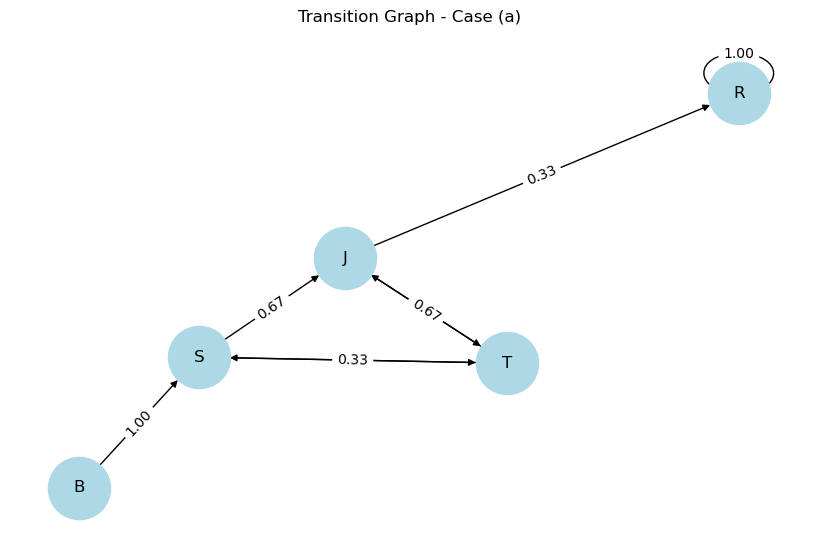

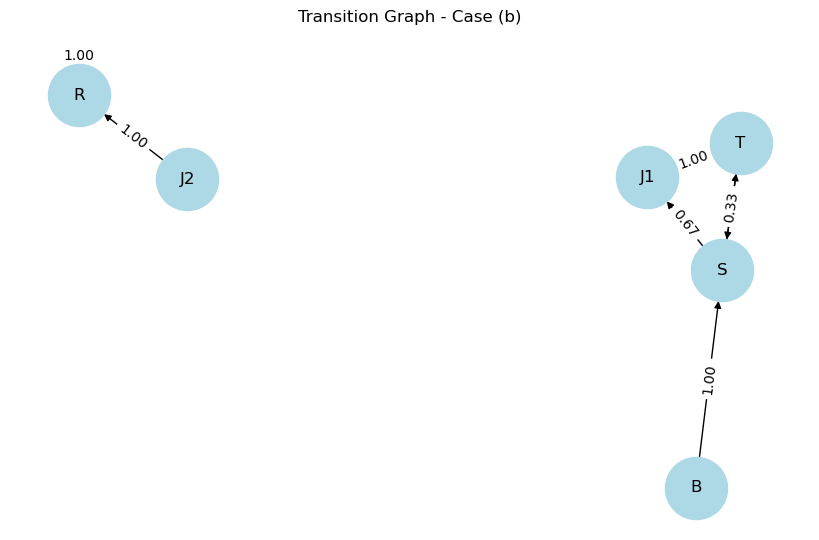

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

def draw_markov_graph(transitions, title):
    G = nx.DiGraph()
    
    # Add edges with weights
    for from_state, to_states in transitions.items():
        for to_state, prob in to_states.items():
            if prob > 0:
                G.add_edge(from_state, to_state, weight=prob)
    
    pos = nx.spring_layout(G, seed=42)
    edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in G.edges(data=True)}
    
    plt.figure(figsize=(8, 5))
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue', arrows=True)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.title(title)
    plt.show()


# ----- CASE (a) -----
transitions_a = {
    'T': {'S': 0.5, 'J': 0.5},
    'S': {'T': 1/3, 'J': 2/3},
    'B': {'S': 1.0},
    'J': {'T': 2/3, 'R': 1/3},
    'R': {'R': 1.0}
}
draw_markov_graph(transitions_a, "Transition Graph - Case (a)")


# ----- CASE (b) -----
transitions_b = {
    'T': {'S': 0.5, 'J1': 0.5},
    'S': {'T': 1/3, 'J1': 2/3},
    'B': {'S': 1.0},
    'J1': {'T': 1.0},
    'J2': {'R': 1.0},
    'R': {'R': 1.0}
}
draw_markov_graph(transitions_b, "Transition Graph - Case (b)")